In [1]:
import seaborn
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

dataset = 'cifar100'

In [2]:
def read_accuracy_from_txt(file_path):
    accuracy_list = []
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            line = line.strip()
            # 跳过空行和注释行
            if not line or line.startswith('#'):
                continue
            
            try:
                data_tuple = eval(line)
                if isinstance(data_tuple, tuple) and len(data_tuple) > 0:
                    data_dict = data_tuple[0]  # 取元组的第一个元素
                    if isinstance(data_dict, dict) and 'accuracy' in data_dict:
                        accuracy_list.append(data_dict['accuracy'])
            except:
                continue
    
    return accuracy_list


data_group_1 = read_accuracy_from_txt('/root/learning-tangle/prints/fmnist/fmnist-fedavg.txt')
data_group_2 = read_accuracy_from_txt('/root/learning-tangle/prints/fmnist/fmnist-tangle.txt')
data_group_3 = read_accuracy_from_txt('/root/learning-tangle/prints/fmnist/fmnist-tanglecta.txt')

print(len(data_group_1))
print(len(data_group_2))
print(len(data_group_3))

101
101
101


In [3]:
def smooth_data(data, window_size=5):
    smoothed_acc = []
    
    for i in range(len(data)):
        start = max(0, i - window_size // 2)
        end = min(len(data), i + window_size // 2 + 1)
        smoothed_acc.append(np.mean(data[start:end]))
    
    return smoothed_acc

window_size=15
data_group_1_smooth = smooth_data(data_group_1, window_size)
data_group_2_smooth = smooth_data(data_group_2, window_size)
data_group_3_smooth = smooth_data(data_group_3, window_size)

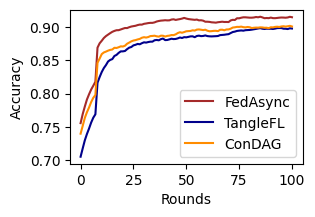

In [4]:
rounds = list(range(0, 101, 1))

plt.figure(figsize=(3,2))
plt.plot(rounds, data_group_1_smooth, label='FedAsync', color='brown')
plt.plot(rounds, data_group_2_smooth, label='TangleFL', color='darkblue')
plt.plot(rounds, data_group_3_smooth, label='ConDAG', color='darkorange')

plt.legend(loc='lower right')
plt.xlabel('Rounds')
plt.ylabel('Accuracy')

plt.show()
